# I.Linear Regression

## 1.Linear regression with one variable

In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.


You would like to use this data to help you select which city to expand
to next.

The file **ex1data1.txt** contains the dataset for our linear regression problem.
The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.

#### 1.1.Plotting the Data

Before starting on any task, it is often useful to understand the data by
visualizing it. For this dataset, you can use a scatter plot to visualize the
data, since it has only two properties to plot (prot and population). (Many
other problems that you will encounter in real life are multi-dimensional and
can't be plotted on a 2-d plot.)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D

Load data from **ex1data1.txt**, split it into X and y 

In [2]:
data = np.loadtxt("ex1data1.txt", delimiter=',')
m, _ = data.shape # get number of training example

X = np.column_stack( (np.ones((m, 1)) , data[:, 0])) # add column of ones before X
y = np.reshape(data[:, 1], (m, -1))


Plot X, y using **matplotlib**

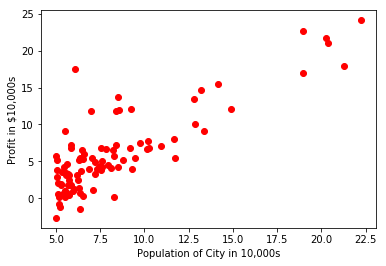

In [3]:
plt.plot(X[:, 1], y, 'ro')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

#### 1.2.Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset
using gradient descent.

##### 1.2.1.Update Equation

The objective of linear regression is to minimize the cost function
$$J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_{\theta}(x^{(i)}) - y^{(i)})^{2}$$

where the hypothesis $h_{\theta}$ is given by the linear model
$$h_\theta(x) = \theta^{T}x = \theta_0 + \theta_1x_1$$

Recall that the parameters of your model are $\theta_j$ values. These are the values you will adjust to minizize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update
$$\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)} )x_j^{(i)}$$

With each step of gradient descent, your parameters $\theta_j$ come closer to optimal values that will achieve the lowest cost $J(\theta)$

##### 1.2.2.Implementation

In [4]:
theta = np.zeros((2, 1)) # initialize fitting parameter
iterations = 1500
alpha = 0.01


###### Compute cost $J(\theta)$

In [5]:
def Cost(theta, X, y):
    h_X = X.dot(theta)
    m, _ = X.shape
    return (h_X - y).T.dot(h_X - y) / (2*m)

###### Update $\theta$

In [6]:
def UpdateTheta(theta, X, y, alpha):
    m, _ = X.shape
    return theta - (alpha/m) * X.T.dot((X.dot(theta) - y))

For each iteration, the cost $J(\theta)$ will decrease to minimum, and $\theta$ will be our solution

In [7]:
theta_history = np.zeros((iterations, 2))
Cost_history = np.zeros((iterations, 1))

In [8]:
for i in range(iterations):
    theta_history[i] = theta.T
    Cost_history[i] = Cost(theta, X, y)
    theta = UpdateTheta(theta, X, y, alpha)

Visualizing $J(\theta)$ and $\theta$

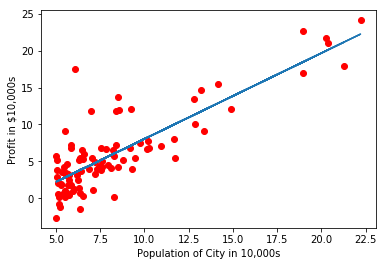

In [9]:
plt.plot(X[:, 1], y, 'ro', X[:, 1], X.dot(theta))
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

## 2.Linear Regression with multiple variables

In this part, you will implement linear regression with multiple variables to
predict the prices of houses. Suppose you are selling your house and you
want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing
prices.

The file **ex1data2.txt** contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.


### 2.1.Feature Normalization

The ex1 multi.m script will start by loading and displaying some values
from this dataset. By looking at the values, note that house sizes are about
1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge
much more quickly.

Your task here is to complete the code in featureNormalize.m to
1. Subtract the mean value of each feature from the dataset.
2. After subtracting the mean, additionally scale (divide) the feature values
by their respective *standard deviations*

##### Load data from ex1data2.txt 

In [39]:
data2 = np.loadtxt("ex1data2.txt", delimiter=',')
m, _ = data2.shape # get number of training example

X = np.insert(data2[:,0:2], 0, 1, axis=1)
y = np.reshape(data2[:,2], (m, 1))


##### Features normalization

With each features (excluded $x_0$ because it is the bias term that we added) in training example, we scale that features so it's mean is 0.
We can do it by below formula
$$x_i^{'} = \frac{x_i-\mu_i}{\sigma_i}$$

which $\mu_i$ is the mean of feature $(i)$ in training example,
      $\sigma_i$ is the standard deviation of feature $(i)$ in training example

In [40]:
features_mean = np.mean(X[:, 1:3], axis=0)
features_standard_deviation = np.std(X[:, 1:3], axis=0)
X[:, 1:3] = (X[:, 1:3] - features_mean) / features_standard_deviation

##### Training our model

In [41]:
theta = np.zeros((3, 1)) # initialize fitting parameter
iterations = 500
alpha = 0.01
J_history = np.zeros(iterations) # store value of J for every iteration, for visualize purpose

In [44]:
# np.seterr(invalid='ignore')
for i in range(iterations):
    J_history[i] = Cost(theta, X, y)
    theta = UpdateTheta(theta, X, y, alpha)

##### Visual Cost function through iterations 

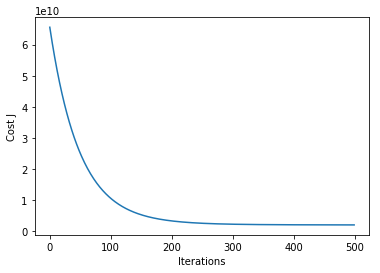

In [22]:
x_ = np.array([x for x in range(iterations)])
plt.plot(x_, J_history)
plt.xlabel("Iterations")
plt.ylabel("Cost J")
plt.show()

##### Test our model with new data

In [15]:
data = np.array([1650, 3])
data = (data - features_mean) / features_standard_deviation
data = np.insert(data, 0, 1)
theta.T.dot(data)

array([ 254244.68555897])

##### Normal Equation

In [45]:
normal_equation_theta = linalg.inv( (X.T.dot(X)) ) \
                              .dot(X.T)\
                              .dot(y)

##### Error vector

In [17]:
error = y - X.dot(normal_equation_theta)

In [46]:
predict_vs_reality = np.column_stack((y, X.dot(normal_equation_theta)))

##### Test normal equation model with new data

In [47]:
data = np.array([1650, 3])
data = (data - features_mean) / features_standard_deviation
data = np.insert(data, 0, 1)
normal_equation_theta.T.dot(data)

array([ 293081.4643349])